## 1. Importing Necessary Libraries

In [29]:
# Import packages
%matplotlib inline
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from itertools import chain
from stdnum import py
from pygments.lexers import go
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from collections import Counter

## 2. Importing Dataset

In [2]:
data = pd.read_csv(r'dataset_breast_cancer.csv')

# show the data of how many rows and columns
print("Data Shape - ", data.shape)

Data Shape -  (569, 33)


# 3. Read the Data

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# description of the current data set
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


From the first look in the data description we can see that :
    - B = benign is the most frequent value in our target columns
    - Unnamed: 32nd columns is an empty column

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

According to the data, all features are numerical values except the target value diagnosis which is an object: M = malignant, B = benign.

# 4. EDA (Exploratory Data Analysis)

## 4.1 Drop Out Unnecessary Column

As the 32nd colum is empty, we will drop it out.

In [6]:
data = data.drop('Unnamed: 32',axis=1)

## 4.2 Check the Missing Value

In [7]:
missing_values = data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


From the tables, it shows that the data is cleaned and no missing value.

In [8]:
# transformation of type of the target value to numerical
le = preprocessing.LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

Diagnosis:

M = malignant => 1
B = benign => 0

Let's also drop out an id column since we also don't need it.

In [9]:
# drop the id columns
data = data.drop('id',axis=1)

## 4.3 Correlation Matrix with Heatmap

A graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value
from -1 to 1.

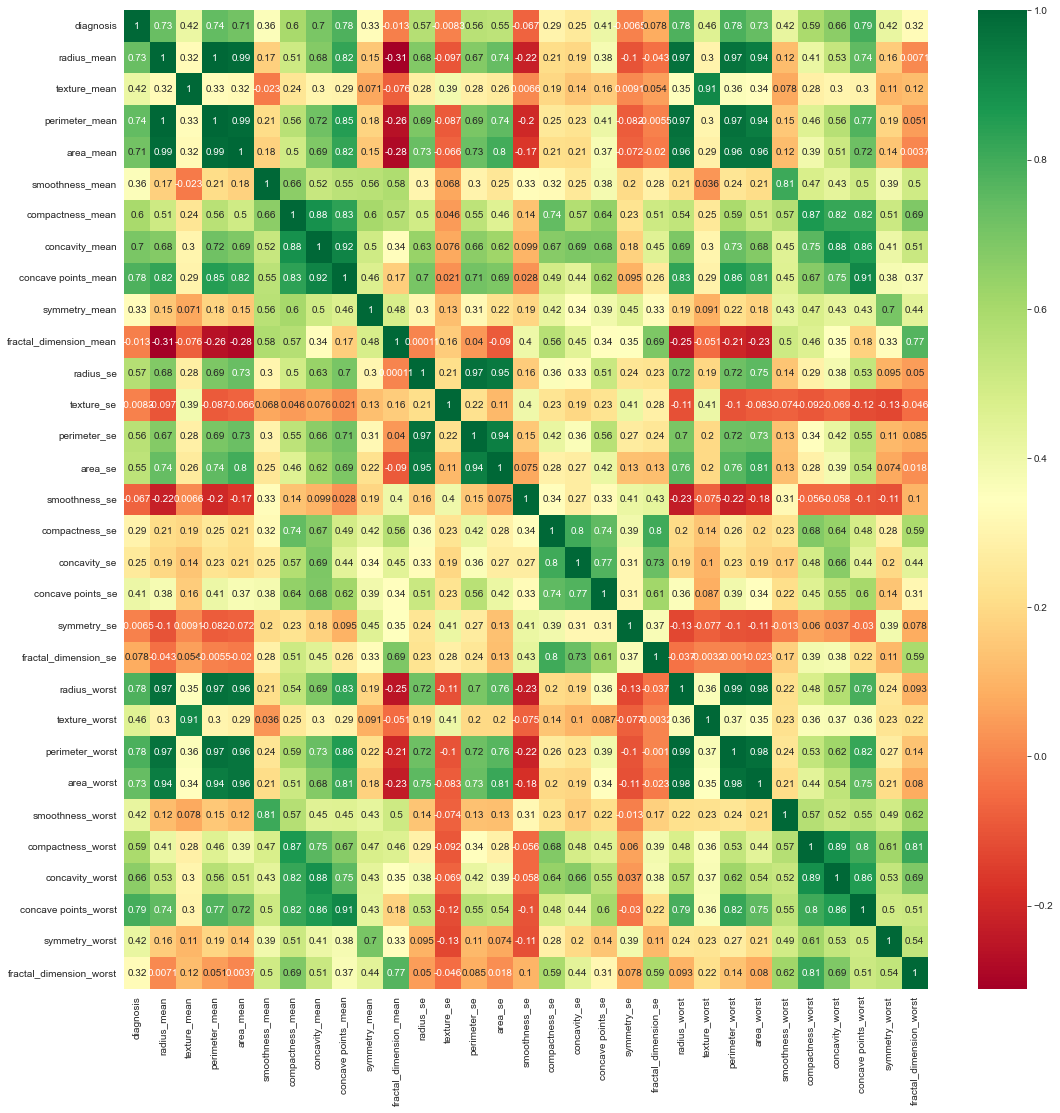

In [10]:
#independent columns
X = data.iloc[:, 0:20]
#target column
y = data.iloc[:, -1]

#get correlations of each features in dataset
corrmatrix = data.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(18, 18))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

From the above correlation heatmap, we could get some of the following information:

- Variables such as radius_worst & radious_mean, radius_worst & parameter_mean, are having strong positive correlation, just to name a few.
- Variables such as radius_worst & smoothness_se, and fractal_dimension_mean & radious_mean are having strong negative correlations: also, just to name a few.
- overall, to view this correlation graph: there are several variables that have no correlation and whose correlation value is near 0, while whose that have strong correlation is closer to 1.

## 4.4 Positive Correlated Features

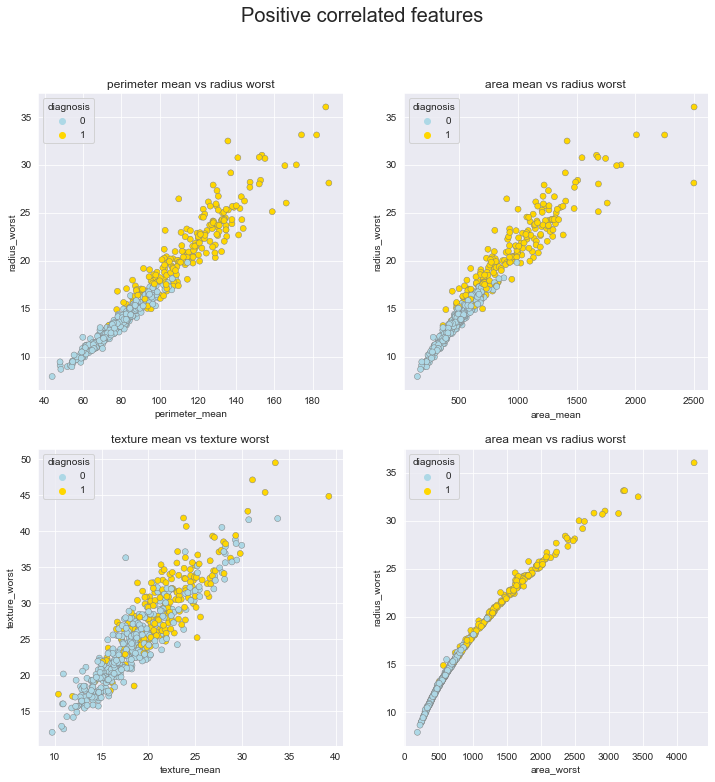

In [11]:
# B = benign => 0
# M = malignant => 1
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

## 4.5 Uncorrelated Features

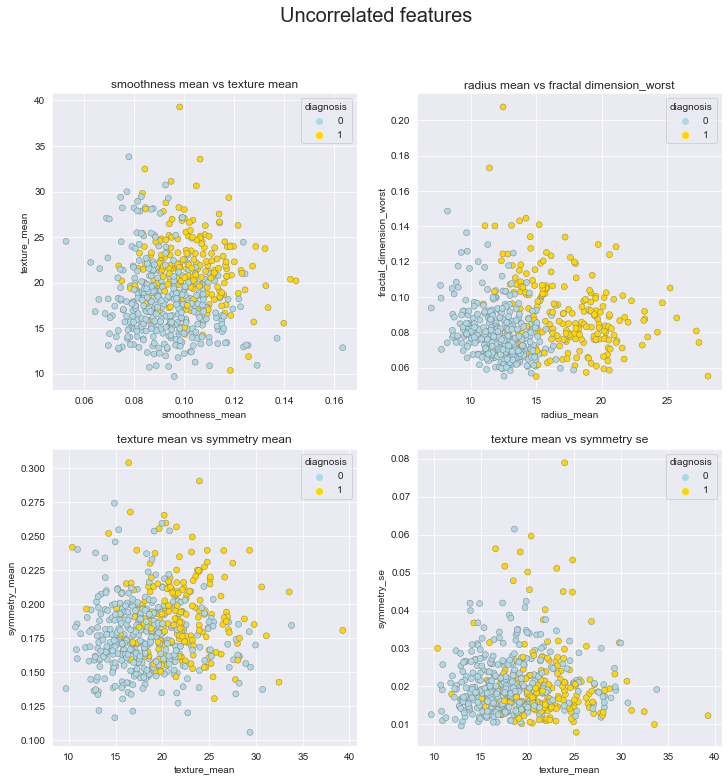

In [12]:
# B = benign => 0
# M = malignant => 1

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

## 4.6 Negative Correlated Features

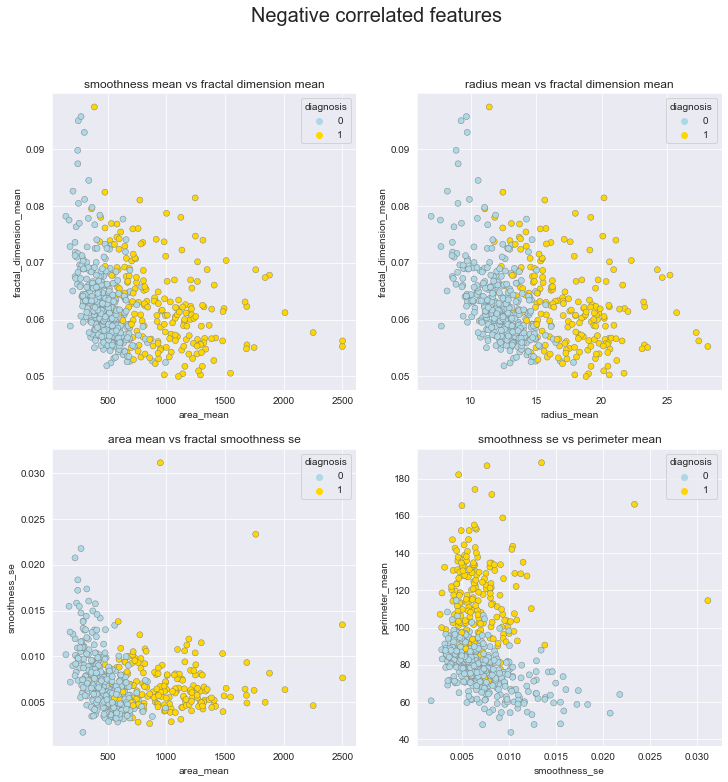

In [13]:
# B = benign => 0
# M = malignant => 1

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# 5. Data Vizualisation

## 5.1 Diagnosis

Text(0.5, 1.0, 'Number of diagnosis ')

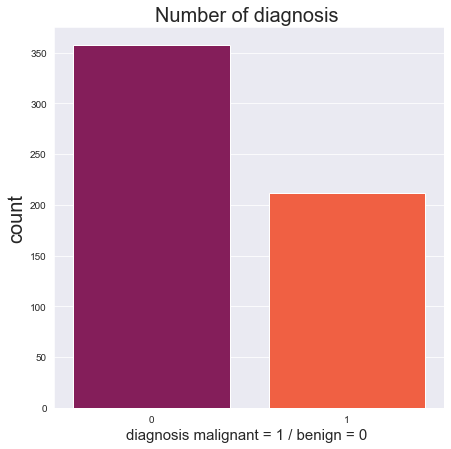

In [14]:
#bar chart
plt.rcParams['figure.figsize']=7,7
sns.set_style("darkgrid")
ax = sns.countplot(x=data.diagnosis , palette = "rocket", saturation =1.5)
plt.xlabel("diagnosis malignant = 1 / benign = 0 ", fontsize = 15 )
plt.ylabel("count", fontsize = 20)
plt.title('Number of diagnosis ', fontsize = 20)

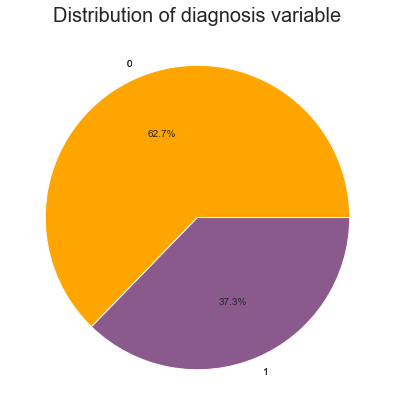

In [15]:
#pie chart in percentile
# B = benign => 0
# M = malignant => 1
label=data.diagnosis.value_counts().index
count=data.diagnosis.value_counts().values
color = ['orange', '#8B5A8C']

plt.pie(count,labels=label)
plt.title('Distribution of diagnosis variable', fontsize = 20)
plt.figure(1, figsize=(20,15))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%')
plt.show()

Ploting the histogram of these values so we can better observer their values and data distribution. In order to do so, we are going to separate, for each histogram, the values depending on the diagnosis column.

## 5.2 Features vs Diagnosis

Observations:
- mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

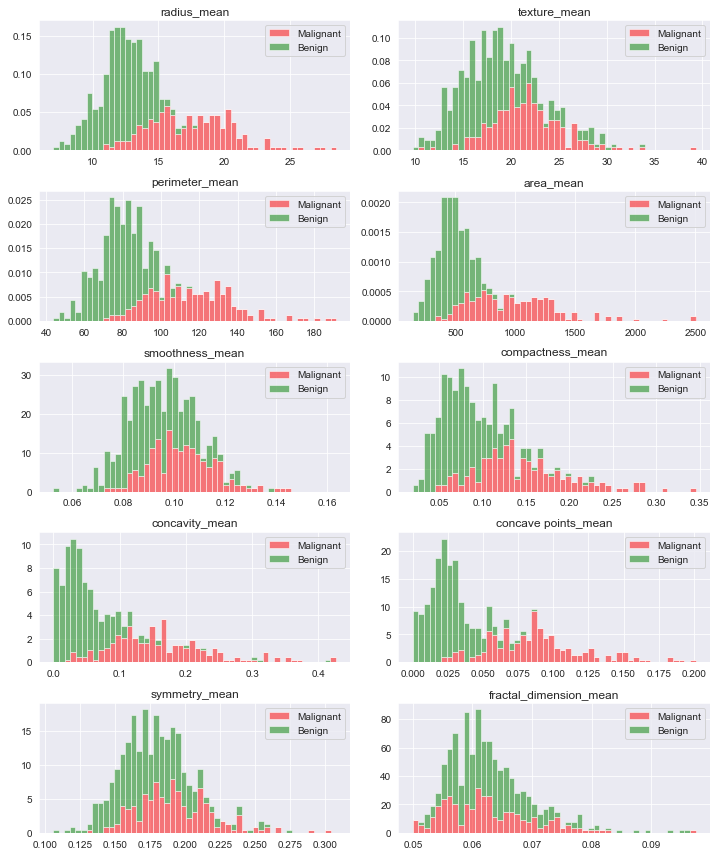

In [16]:
# B = benign => 0
# M = malignant => 1

features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['Malignant','Benign'], color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

From these ten graphs we can observe, these features might be useful in predicting whether a patient has cancer or not due to the distinct grouping between malignant and benign. We can also see the most frequent malignant value of these features under each graph, although visually they may vary since we might not have an optimal bin width, bust most of them match with the values histograms show.

# 6 Feature Selection

[0.049089   0.02106332 0.07168566 0.05240176 0.00867888 0.02125187
 0.05287019 0.07196913 0.0080209  0.00637612 0.02117638 0.00603676
 0.02681175 0.02307066 0.0063702  0.00624377 0.00750042 0.00634489
 0.0050905  0.00543717 0.07949623 0.02145815 0.11954838 0.06785098
 0.02215986 0.03193671 0.05151159 0.10036974 0.01738799 0.01079103]


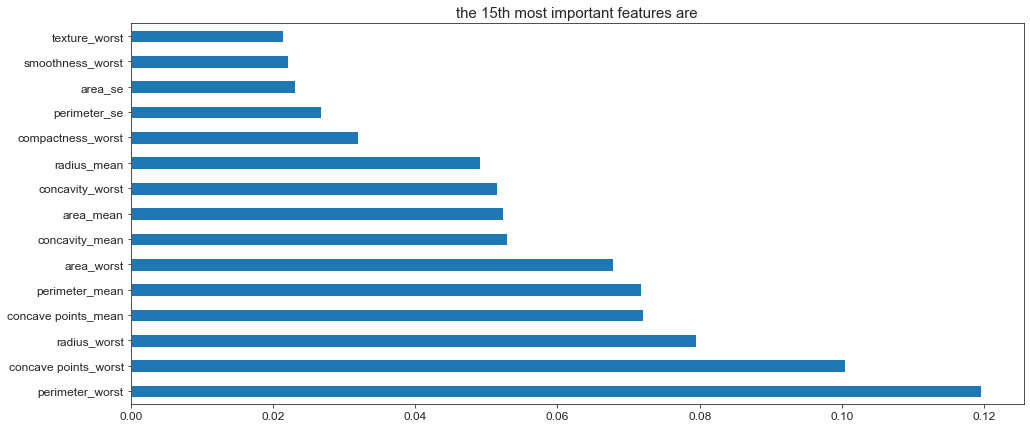

In [17]:
# B = benign => 0
# M = malignant => 1

plt.rcParams['figure.figsize']=16,7
sns.set_style("ticks")

x = data.drop('diagnosis',axis=1)
y = data.diagnosis

model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=x.columns)

feat_importance.nlargest(15).plot(kind='barh', fontsize=12)
plt.title('the 15th most important features are', fontsize=15)
plt.show()

Let's check our current column name.

In [18]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Drop out unimportant features, and choose just the best 15 according the bar chart.

In [19]:
data=data.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

In this section, we manipulate the data to prepare it for modeling. There are three main steps that we can take:

- Splitting the data into a training set, a validation set (to help me develop my models), and a test set (to help me evaluate the final version of each model);
- Resampling the training set so that all classes are equally represented;
- Scaling the data, which will help ensure that PCA and some machine learning algorithms work properly;
- Principal Components Analysis (PCA), which will reduce the dimensions of the data and eliminate any multicollinearity.

We do all these steps first to the training data so that we can check the outcome at each step. Once that's done, we put the essential preprocessing steps into a pipeline that I can use to transform the validation and test sets.

## 6.1 Train-Validation-Test Split

We will take 80% of the total dataset to use as training data. The remaining 20% of the original dataset will be devoted half of that to validation and half to be used as a true holdout set, which will be used to evaluate the final versions of each of my models.

In [20]:
# Split first into training and test datasets
X = data.drop('diagnosis', axis=1)
y = data.diagnosis


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [21]:
# Split again into validation and true holdout (test) datasets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                random_state=1,
                                                stratify=y_test)

In [22]:
# Examine shapes of the subsets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(455, 14) (455,)
(57, 14) (57,)
(57, 14) (57,)


As we will compare model performance on the raw data and the preprocessed version, so at this point (before preprocessing) we will save copies for later used.

In [23]:
# Save raw copies of train and validation sets before further preprocessing
X_train_raw = X_train.copy()
y_train_raw = y_train.copy()

X_val_raw = X_val.copy()
y_val_raw = y_val.copy()

## 6.2 Resampling

The preprocessing step is to deal with the class imbalance. As we can see earlier Benign: 0 is more than 60% pf the data set while Malignant:1 is only 30%
The overall strategy is to under-sample the bigger classes and over-sample the smaller ones so that both classes are the same size as the median-sized class.

First, Let's put the training data back into one DataFrame to make things a little easier.

In [24]:
# Concatenate X_train and y_train for resampling
df_train = pd.concat([X_train, y_train], axis=1)
print(len(df_train))
df_train.head()

455


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
195,12.91,82.53,516.4,0.03873,0.02377,0.1942,15.750,13.88,22.00,90.81,600.6,0.1506,0.1764,0.08235,0
560,14.05,91.38,600.4,0.04462,0.04304,0.3645,29.840,15.30,33.17,100.20,706.7,0.2264,0.1326,0.10480,0
544,13.87,89.77,584.8,0.03688,0.02369,0.2720,23.120,15.05,24.75,99.17,688.6,0.2037,0.1377,0.06845,0
495,14.87,96.12,680.9,0.06824,0.04951,0.2323,21.840,16.01,28.48,103.90,783.6,0.1388,0.1700,0.10170,0
527,12.34,78.94,468.5,0.02958,0.02647,0.1166,8.955,13.61,19.27,87.22,564.9,0.2074,0.1791,0.10700,0


In [25]:
# Check for class imbalance
df_train.diagnosis.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

Let's use RandomUnderSampler and SMOTE to undersample the larger classes and oversample the smaller one.

In [26]:
# Randomly undersample the larger classes
rus = RandomUnderSampler(random_state=2,
                         sampling_strategy={0:170, 1:170,})

X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Check class counts
Counter(y_rus)

Counter({0: 170, 1: 170})

In [28]:
# Randomly oversample the smaller classes
smote = SMOTE(random_state=2, sampling_strategy={0:170, 1:170})

X_resampled, y_resampled = smote.fit_resample(X_rus, y_rus)

# Check class counts
Counter(y_resampled)

Counter({0: 170, 1: 170})

The final count above shows that the classes are now balanced.

## 6.3 Scaling

The next transformation is to standardize the features.

In [30]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled = pd.DataFrame(X_scaled)

In [31]:
# Check the results
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,340.000000,3.400000e+02
mean,1.671865e-16,-2.089832e-16,3.343731e-16,4.179663e-17,-1.671865e-16,-1.671865e-16,-1.671865e-16,1.671865e-16,-7.523394e-16,6.687461e-16,1.253899e-16,4.179663e-17,0.000000,2.507798e-16
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474,1.001474e+00
min,-2.105653e+00,-2.058070e+00,-1.531661e+00,-1.219892e+00,-1.364336e+00,-1.131877e+00,-8.342892e-01,-1.795846e+00,-2.156398e+00,-1.758942e+00,-1.290713e+00,-1.388356e+00,-1.378651,-1.845322e+00
25%,-7.317808e-01,-7.396325e-01,-7.247112e-01,-7.994030e-01,-8.112024e-01,-6.881865e-01,-5.923597e-01,-7.558534e-01,-7.463687e-01,-7.918375e-01,-7.164998e-01,-7.261254e-01,-0.772652,-8.244592e-01
50%,-1.976548e-01,-1.803810e-01,-2.977927e-01,-2.723864e-01,-2.724760e-01,-3.216896e-01,-3.828120e-01,-2.021539e-01,-2.857914e-02,-2.147187e-01,-2.980435e-01,-2.609313e-01,-0.136887,-1.004898e-01
75%,6.592426e-01,6.445077e-01,5.623804e-01,6.278587e-01,7.179306e-01,3.752171e-01,2.620865e-01,6.245436e-01,7.091712e-01,6.092442e-01,4.904150e-01,5.284055e-01,0.564913,7.758660e-01
max,3.414955e+00,3.522162e+00,4.757733e+00,3.799257e+00,3.229306e+00,7.288812e+00,1.064360e+01,3.617892e+00,3.699296e+00,3.778916e+00,5.215889e+00,4.495674e+00,4.142262,2.323366e+00


The features have now been standardized so that they all have a mean of 0 and a standard deviation of 1.

Let's just get a quick visual confirmation of this change with some histograms.

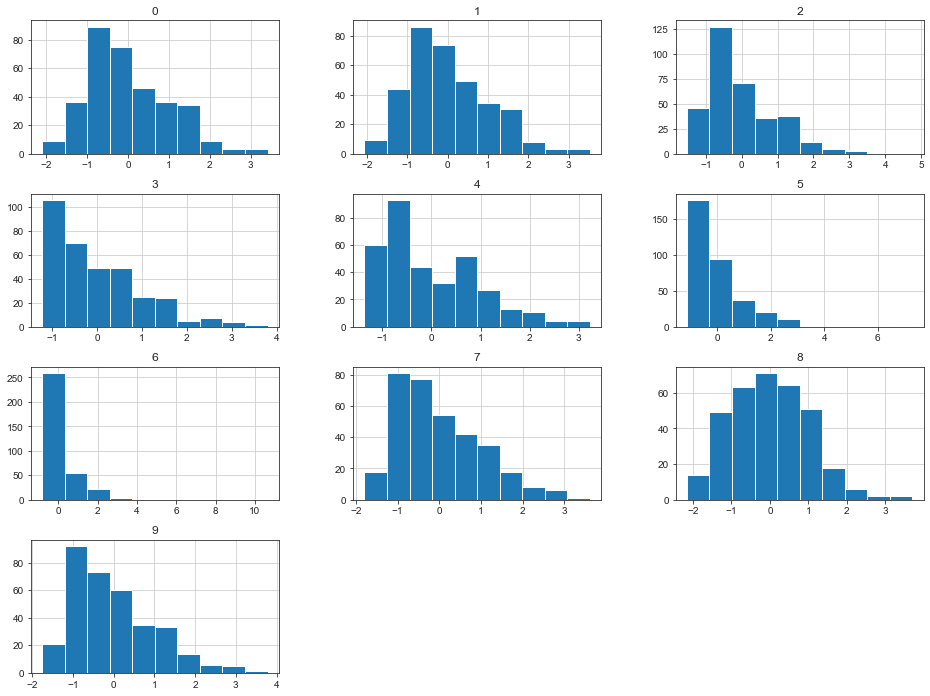

In [32]:
# Visualize the distributions again
X_scaled.loc[:,:9].hist(figsize=(16, 12));

## 6.4 PCA

# 7. Define Functions

This part is essential to measure the performance of a model : roc, cross validation, learning curve.

## 7.1. Confusion Matrix and Show Metrics

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

true positive (TP) : Malignant tumour correctly identified as malignant
true negative (TN) : Benign tumour correctly identified as benign
false positive (FP) : Benign tumour incorrectly identified as malignant
false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :

Accuracy : (TP +TN) / (TP + TN + FP +FN)
Precision : TP / (TP + FP)
Recall : TP / (TP + FN)

In [ ]:
# Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Show metrics
cm = confusion_matrix(y_test, y_score)

def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    #print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

## 7.2 Precision – Recall curve

The precision-recall curve shows the tradeoff between precision and recall for different threshold

In [ ]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

## 7.3. ROC curve¶

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## 7.4  Learning curve

The Learning curve determines cross-validated training and test scores.

In [ ]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

## 7.5 Cross validation metrics

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [ ]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

# 8. Machine Learning Applications

y = diagnosis (target)
X = features (radius_mean, area_se, ....)

In [ ]:
# Def X and y
y = np.array(data.diagnosis.tolist())
data = data.drop('diagnosis', 1)
X = np.array(data.as_matrix())

Standard scaler (X) to help to rescale the attributes so that they have mean as 0 and variance as 1.
The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

In [ ]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = 42)

In [ ]:
# Split again into validation and true holdout (test) datasets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                random_state=1,
                                                stratify=y_test)

In [ ]:
# Examine shapes of the subsets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

## 8.1


In [ ]:
#models

In [ ]:
#findout best parameter

In [ ]:
#fit the models

In [ ]:
#visualisation of the result

In [ ]:
#validation

In [ ]:
#Visualie the result

In [ ]:
#Hyperparameter tunning

In [ ]:
#visualise the result

# 9. Displaying Best Model

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree', 'LightGBM', 'GBM', 'GBM2', 'AdaBoost',
              'XGBoost', 'CatBoost', 'Naive Bayes'],
    'Score': [acc_svm, acc_knn, acc_logreg, acc_randomforest, acc_dt, acc_lgb,
              acc_gbm, acc_gbm2, acc_adaboost, acc_xgboost, acc_catboost, acc_nb]})
models.sort_values(by='Score', ascending=False)
plt.rcParams['figure.figsize'] = 15, 6
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette="rocket", saturation=1.5)
plt.xlabel("Classifier Models", fontsize=20)
plt.ylabel("% of Accuracy", fontsize=20)
plt.title("Accuracy of different Classifier Models", fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha='center', fontsize='x-large')
plt.show()